<a href="https://colab.research.google.com/github/jcsmcmendes/Step_Class/blob/main/Classification_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import f1_score

In [ ]:
#Load data and define input variables (features) from the target variable (label)
df = pd.read_csv("email_phishing_step.csv") #Import Data
df.head()#Cheking the columns in the file

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,106,75,36,0,0,0,7,0,1
1,298,139,58,0,0,0,56,0,0
2,52,40,17,0,0,0,2,0,0
3,454,176,93,22,3,12,103,0,0
4,248,128,52,0,0,4,33,0,0


In [ ]:
X = df.drop('label', axis=1)  #Select predictors
y = df['label'] #Selesct Target
print('Input variables:', X.head())
print('Target variables:', y.head())

Input variables:    num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0        106                75             36          0                   0   
1        298               139             58          0                   0   
2         52                40             17          0                   0   
3        454               176             93         22                   3   
4        248               128             52          0                   0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  
0                    0                    7                    0  
1                    0                   56                    0  
2                    0                    2                    0  
3                   12                  103                    0  
4                    4                   33                    0  
Target variables: 0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64


Class distribution: Counter({0: 10107, 1: 6949})


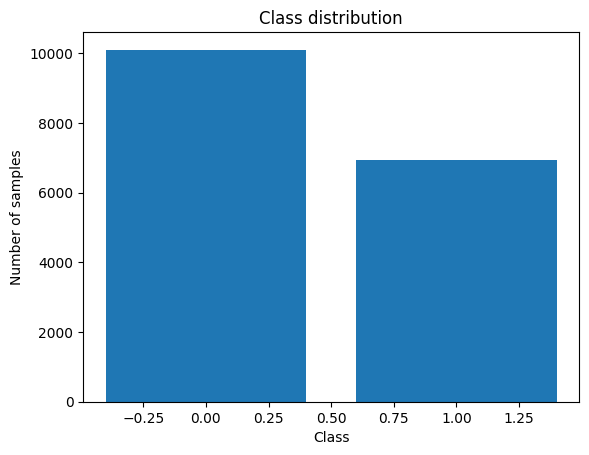

In [ ]:
counter = Counter(y)#Checking distribution of the data by class
print("Class distribution:", counter)

# Optional: Bar plot
plt.bar(counter.keys(), counter.values())
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

## 🔁 Choose your model to balance, validate and classify data

In [ ]:
#models_list = {
#    'Logistic Regression': LogisticRegression(),
#    'KNN': KNeighborsClassifier(n_neighbors=5),
#    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42),
#    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)}
#Balance_methods = {SMOTE, oversampling, undersampling}
#Validation_list = {K-fold cross-validation, Repeated Random Train/test, Single Train}


📊 1️⃣ K-Fold Results:
F1 Score (mean): 0.792
Accuracy (mean): 0.799

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10107
           1       0.75      0.76      0.76      6949

    accuracy                           0.80     17056
   macro avg       0.79      0.79      0.79     17056
weighted avg       0.80      0.80      0.80     17056



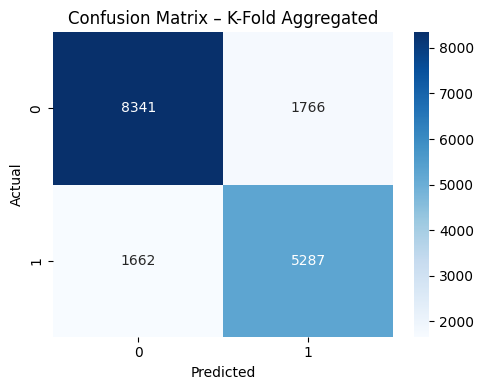

In [ ]:
# 🔁 Base Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 1️⃣ K-Fold Cross-Validation + SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores_kfold = []
acc_scores_kfold = []
all_preds = []
all_true = []

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train) ## other options "RandomOverSampler" & "RandomUnderSampler"

    model.fit(X_train_smote, y_train_smote)
    preds = model.predict(X_val_scaled)

    f1_scores_kfold.append(f1_score(y_val, preds, average='macro'))
    acc_scores_kfold.append(accuracy_score(y_val, preds))

    all_preds.extend(preds)
    all_true.extend(y_val)

# 🔢 Agregados
mean_kfold_f1 = np.mean(f1_scores_kfold)
mean_kfold_acc = np.mean(acc_scores_kfold)

print(f"\n📊 1️⃣ K-Fold Results:")
print(f"F1 Score (mean): {round(mean_kfold_f1, 3)}")
print(f"Accuracy (mean): {round(mean_kfold_acc, 3)}")

# 📈 Classification report geral
print("\n🧾 Classification Report:")
print(classification_report(all_true, all_preds))

# 🔷 Matriz de confusão
cm = confusion_matrix(all_true, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – K-Fold Aggregated")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()